#### Bibliotecas e Base de Dados

In [23]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
# Carregar o dataframe tratado
df = pd.read_csv("base_tratada_lingualab.csv")


In [24]:
df

,ID_Cliente,Motivo,Education,Cidade,Renda_anual,Aulas,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa,motivo_na,renda_na,Quartos_Banheiros,faixa_idade
0,0,Viagem,Graduação,São Paulo,58138.000000,Ingles,4,19,1983,3,4,False,False,4Q_3B,1980s
1,1,Trabalho,Graduação,Taubaté,46344.000000,Espanhol,4,10,1980,4,3,False,False,3Q_4B,1980s
2,3,Viagem,Graduação,São Paulo,20941.846715,Espanhol,4,22,2010,1,1,False,True,1Q_1B,2010s
3,4,Trabalho,Doutorado,São Paulo,58293.000000,Ingles,3,8,2007,3,4,False,False,4Q_3B,2000s
4,5,Trabalho,Mestrado,São Paulo,60704.888889,Espanhol,3,9,1993,4,4,False,True,4Q_4B,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2234,Viagem,Graduação,São Paulo,34421.000000,Espanhol,4,13,2000,2,2,False,False,2Q_2B,2000s
2105,2235,Trabalho,Graduação,São Paulo,60704.888889,Espanhol e Ingles,4,12,1993,4,4,False,True,4Q_4B,1990s
2106,2237,Viagem,Graduação,São Paulo,56981.000000,Espanhol e Ingles,3,1,2007,3,4,False,False,4Q_3B,2000s
2107,2238,Trabalho,Mestrado,São Paulo,69245.000000,Ingles,4,14,1982,3,5,False,False,5Q_3B,1980s


In [25]:
df.describe()

,ID_Cliente,Renda_anual,NPS,Num_Aulas,Ano_de_nascimento,Banheiros_na_casa,Quartos_na_casa
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1124.458511,50987.339256,2.793267,16.349455,1995.576102,2.953532,3.415837
std,647.937902,20534.583248,1.185352,11.641006,11.581758,1.407395,1.721103
min,0.000000,1730.000000,1.000000,1.000000,1919.000000,1.000000,1.000000
25%,560.000000,34578.000000,2.000000,8.000000,1987.000000,2.000000,2.000000
50%,1125.000000,50737.000000,3.000000,13.000000,1997.000000,3.000000,3.000000
75%,1689.000000,67542.798658,4.000000,23.000000,2004.000000,4.000000,5.000000
max,2239.000000,105471.000000,5.000000,53.000000,2022.000000,5.000000,6.000000


#### PERFIL E SEGMENTAÇÃO DE CLIENTES

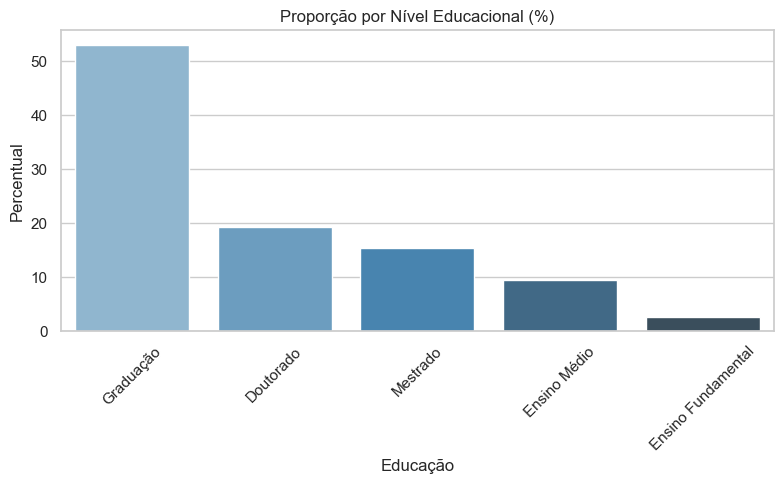

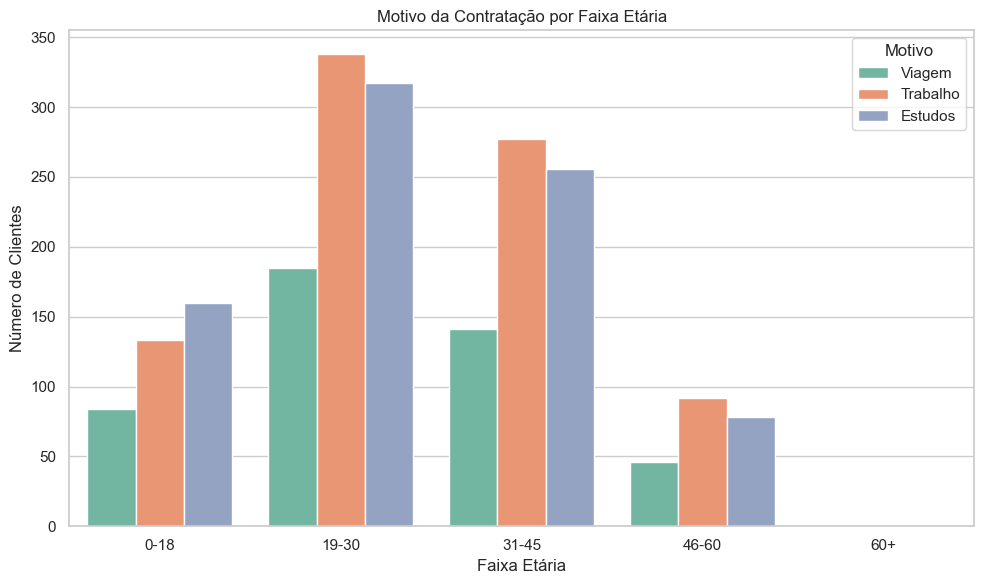

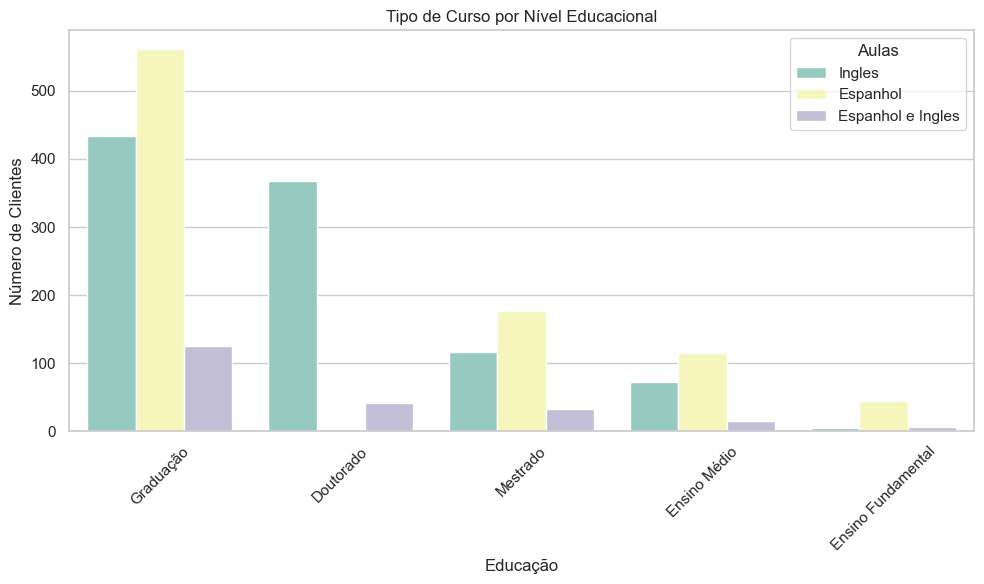

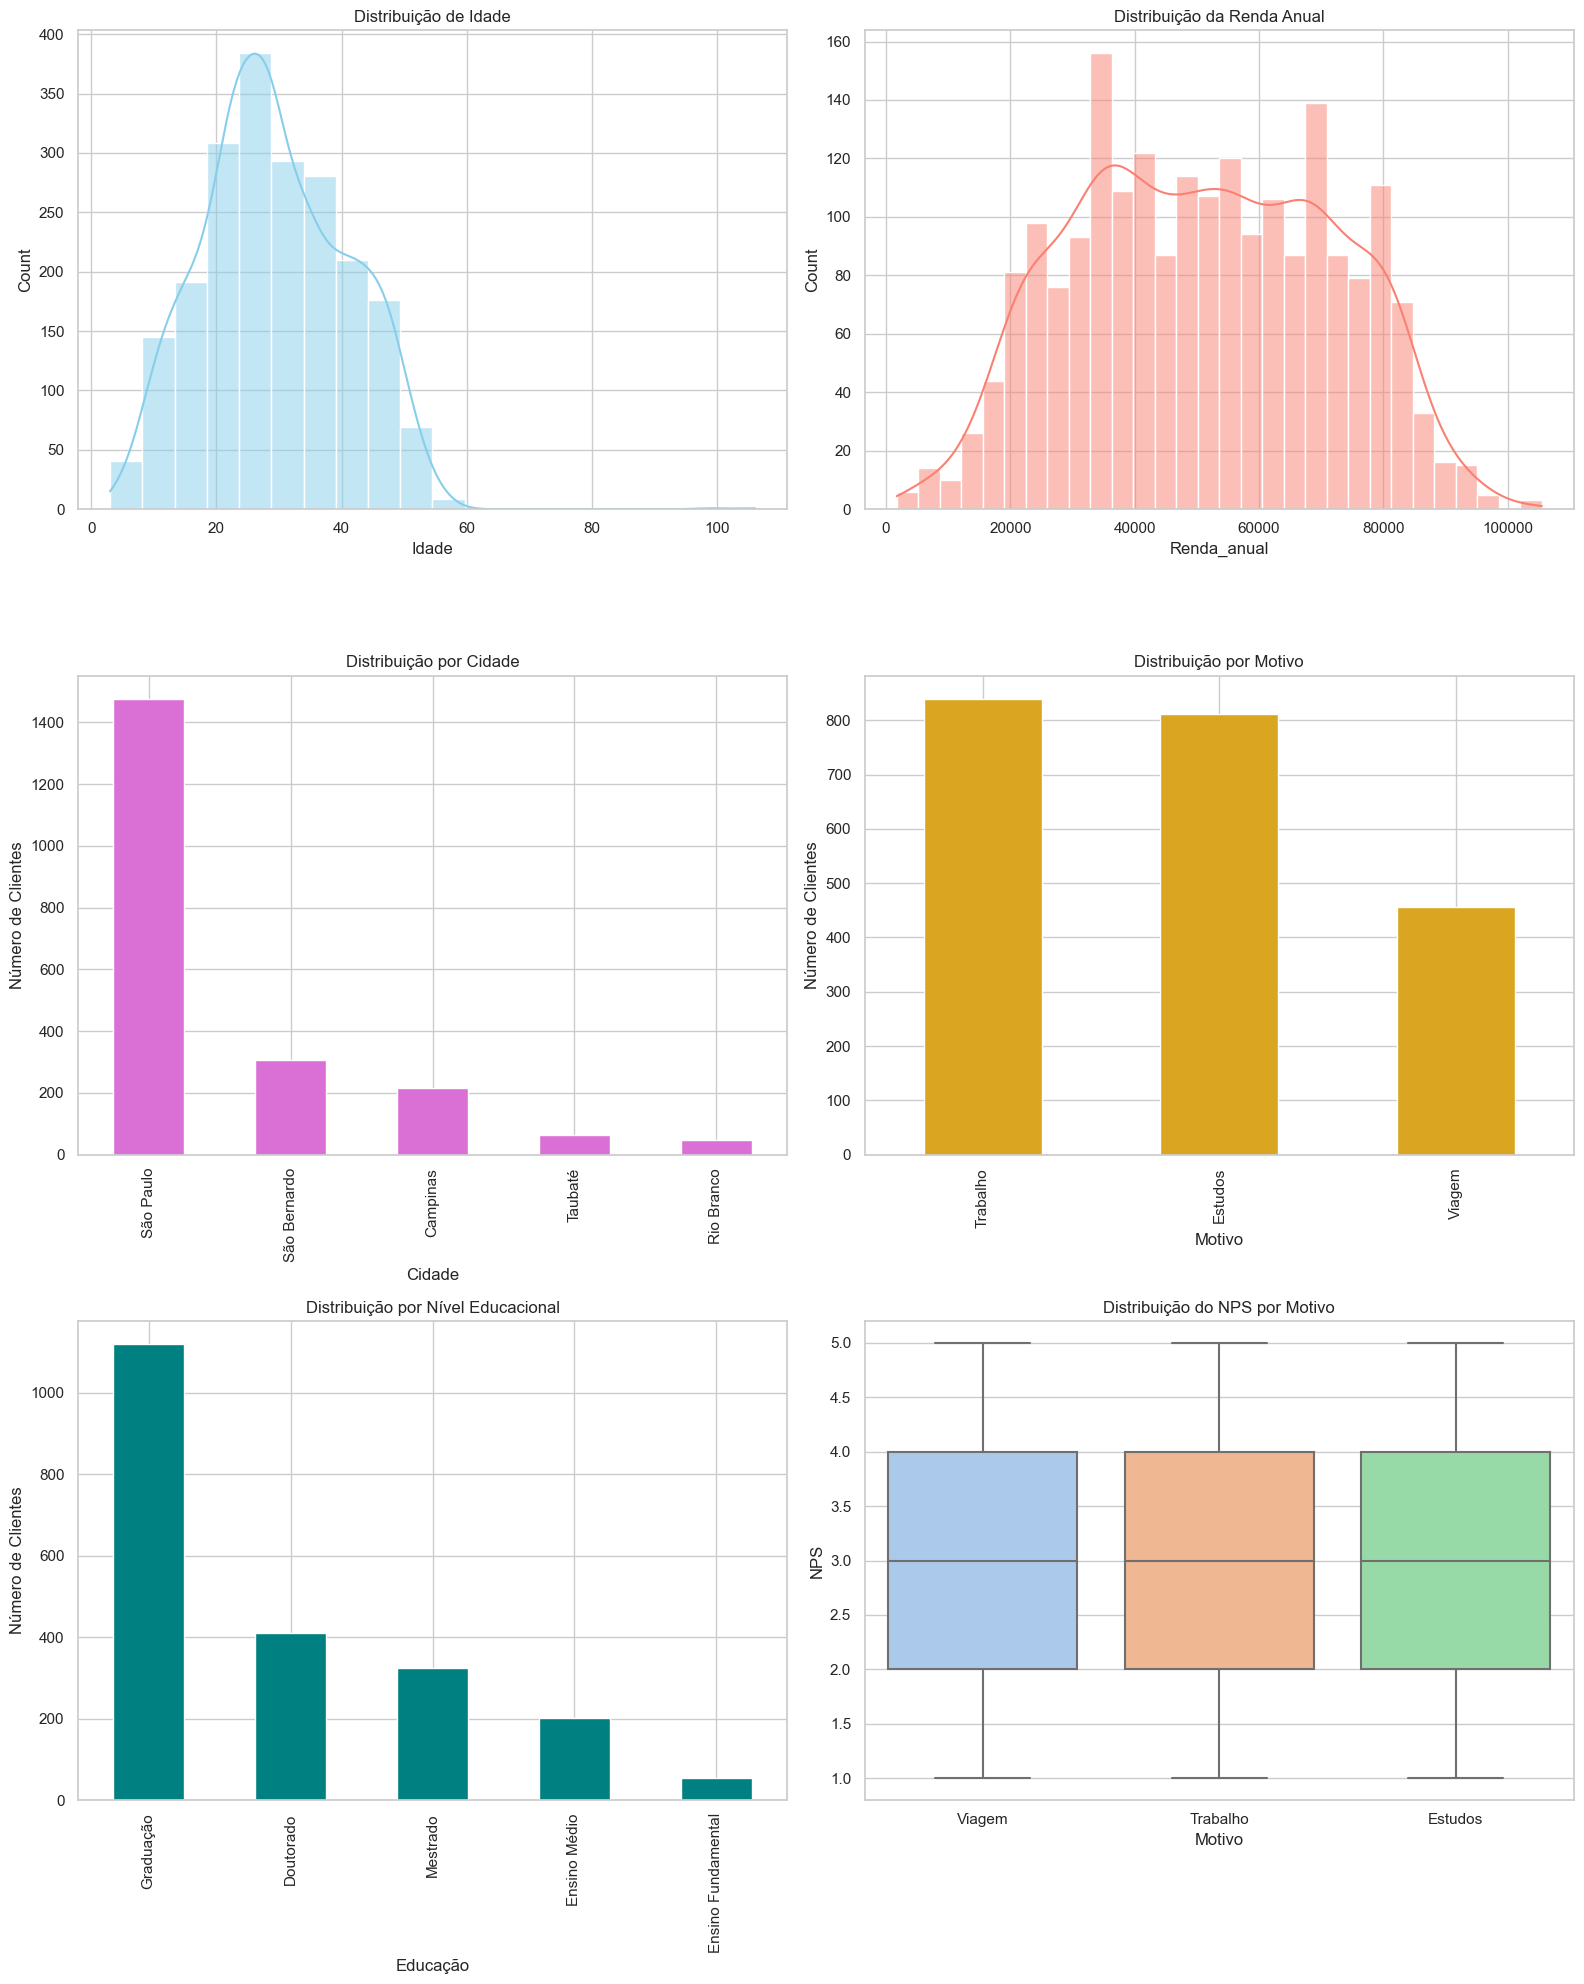

In [26]:

# Adicionando coluna de idade
current_year = datetime.now().year
df["Idade"] = current_year - df["Ano_de_nascimento"]

# Faixa etária
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0, 18, 30, 45, 60, 100],
                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Proporção por nível educacional
plt.figure(figsize=(8, 5))
edu_counts = df["Education"].value_counts(normalize=True).sort_values(ascending=False) * 100
sns.barplot(x=edu_counts.index, y=edu_counts.values, palette="Blues_d")
plt.title("Proporção por Nível Educacional (%)")
plt.ylabel("Percentual")
plt.xlabel("Educação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Motivo da contratação por faixa etária
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Faixa_Etaria", hue="Motivo", palette="Set2")
plt.title("Motivo da Contratação por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Clientes")
plt.tight_layout()
plt.show()

# Tipo de curso por perfil educacional
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Education", hue="Aulas", palette="Set3", order=edu_counts.index)
plt.title("Tipo de Curso por Nível Educacional")
plt.xlabel("Educação")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



df["Idade"] = 2025 - df["Ano_de_nascimento"]
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))

# 1. Distribuição da idade
plt.subplot(3, 2, 1)
sns.histplot(df["Idade"], bins=20, kde=True, color='skyblue')
plt.title("Distribuição de Idade")

# 2. Distribuição da Renda Anual
plt.subplot(3, 2, 2)
sns.histplot(df["Renda_anual"], bins=30, kde=True, color='salmon')
plt.title("Distribuição da Renda Anual")

# 3. Distribuição por Cidade
plt.subplot(3, 2, 3)
df["Cidade"].value_counts().plot(kind='bar', color='orchid')
plt.title("Distribuição por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Número de Clientes")

# 4. Distribuição por Motivo
plt.subplot(3, 2, 4)
df["Motivo"].value_counts().plot(kind='bar', color='goldenrod')
plt.title("Distribuição por Motivo")
plt.xlabel("Motivo")
plt.ylabel("Número de Clientes")

# 5. Distribuição por Nível Educacional
plt.subplot(3, 2, 5)
df["Education"].value_counts().plot(kind='bar', color='teal')
plt.title("Distribuição por Nível Educacional")
plt.xlabel("Educação")
plt.ylabel("Número de Clientes")

# 6. Boxplot: NPS por Motivo
plt.subplot(3, 2, 6)
sns.boxplot(data=df, x="Motivo", y="NPS", palette="pastel")
plt.title("Distribuição do NPS por Motivo")

plt.tight_layout()
plt.show()


clusterização com o algoritmo K-Means.

Resumo por Cluster:
         Idade  Renda_anual  Num_Aulas   NPS  Quartos_na_casa  \
Cluster                                                         
0        30.82     48170.16      20.62  3.10             3.13   
1        31.79     70448.15      19.40  3.02             5.07   
2        26.58     33661.75      11.64  2.45             1.96   

         Banheiros_na_casa  Edu_Ordinal  Motivo_Ordinal  Aulas_Ordinal  \
Cluster                                                                  
0                     2.76         0.23            0.82           1.91   
1                     4.26         2.85            0.84           1.53   
2                     1.80         2.95            0.82           0.22   

         Qtd_Clientes  
Cluster                
0                 376  
1                 845  
2                 888  


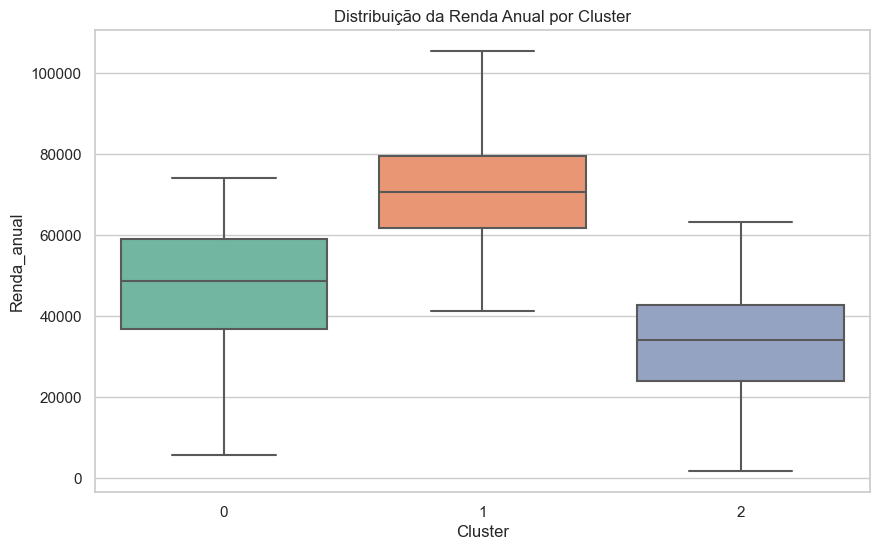

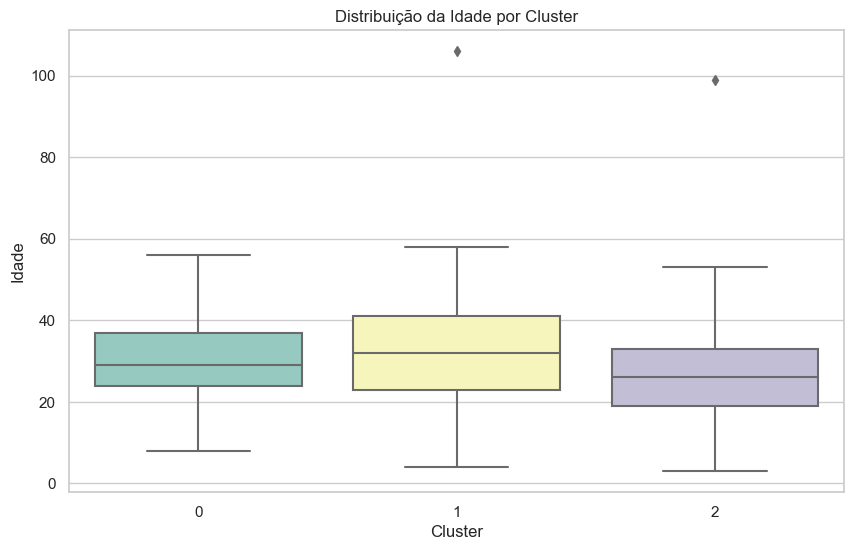

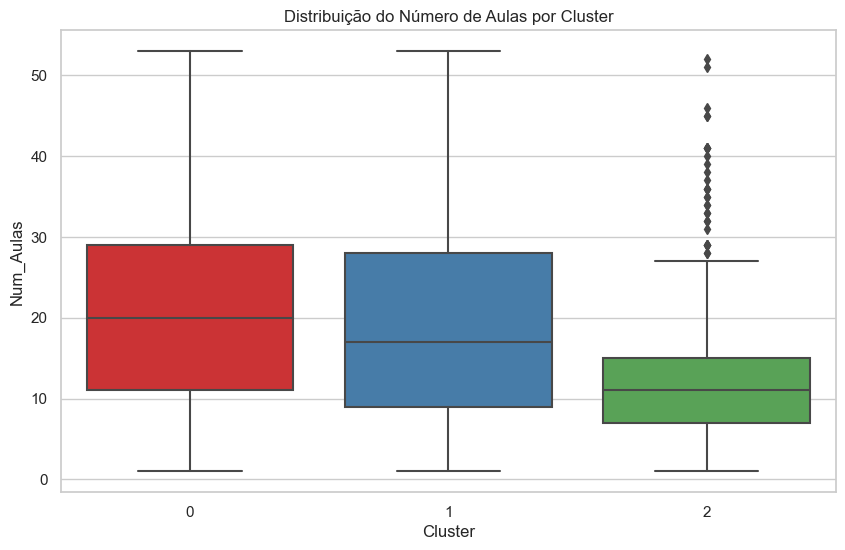

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base
df = pd.read_csv("base_tratada_lingualab.csv")

# Criar coluna de idade
df["Idade"] = 2025 - df["Ano_de_nascimento"]

# Codificação de variáveis categóricas
df["Edu_Ordinal"] = LabelEncoder().fit_transform(df["Education"])
df["Motivo_Ordinal"] = LabelEncoder().fit_transform(df["Motivo"])
df["Aulas_Ordinal"] = LabelEncoder().fit_transform(df["Aulas"])

# Selecionar variáveis para clusterização
features = [
    "Idade", "Renda_anual", "Num_Aulas", "NPS",
    "Quartos_na_casa", "Banheiros_na_casa",
    "Edu_Ordinal", "Motivo_Ordinal", "Aulas_Ordinal"
]

X = df[features]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans com k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Perfil médio por cluster
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
cluster_counts = df["Cluster"].value_counts().sort_index()
cluster_summary["Qtd_Clientes"] = cluster_counts

print("Resumo por Cluster:")
print(cluster_summary)

# Visualização
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Renda_anual", palette="Set2")
plt.title("Distribuição da Renda Anual por Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Idade", palette="Set3")
plt.title("Distribuição da Idade por Cluster")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cluster", y="Num_Aulas", palette="Set1")
plt.title("Distribuição do Número de Aulas por Cluster")
plt.show()


Validações da clusterizacao 

A inércia mede quão compactos os clusters estão. O gráfico mostra a inércia para diferentes valores de k (número de clusters). Quando a redução da inércia começa a diminuir (o “cotovelo”), esse é o número ideal de clusters.

Coeficiente de Silhueta (Silhouette Score)
Esse valor varia entre -1 e 1:
Próximo de 1: pontos estão bem dentro dos seus clusters;
Próximo de 0: pontos estão entre clusters;
Negativo: pontos podem estar em clusters errados.

Visualização em 2D com PCA
Reduzimos a base para 2 dimensões com PCA e plotamos os clusters. Se os grupos forem bem separados visualmente, isso valida a segmentação.

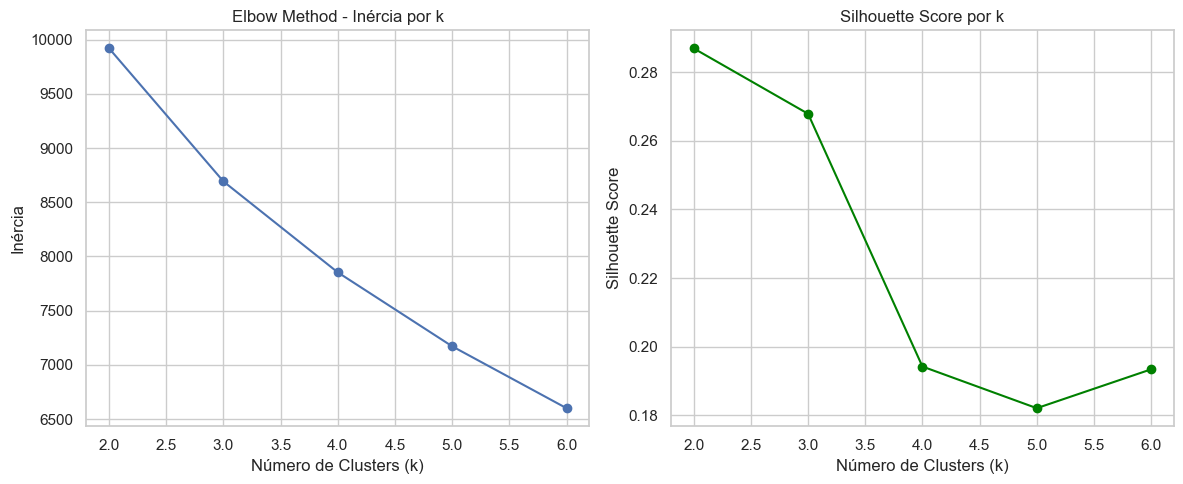

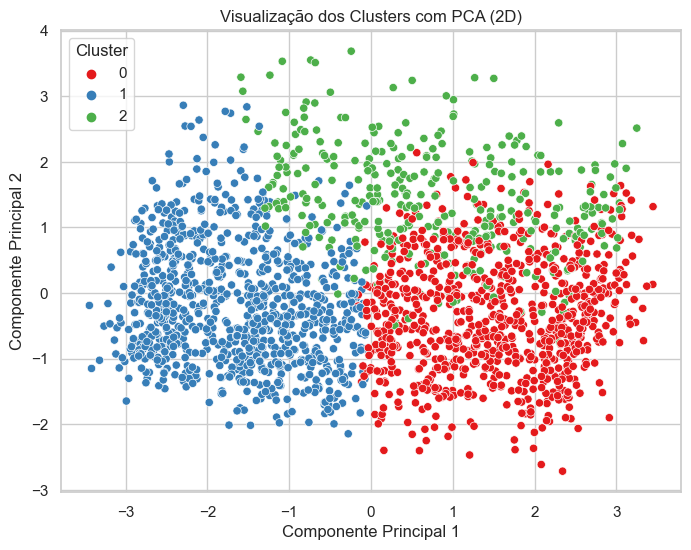

In [30]:
# Reexecutar apenas Elbow Method e Silhouette Score de forma isolada
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
cluster_df = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS',
                 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Elbow + Silhouette Score (até k=6)
inertias = []
silhouettes = []
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(scaled_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(scaled_data, labels))

# Gerar visualizações
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axs[0].plot(range(2, 7), inertias, marker='o')
axs[0].set_title('Elbow Method - Inércia por k')
axs[0].set_xlabel('Número de Clusters (k)')
axs[0].set_ylabel('Inércia')

# Silhouette
axs[1].plot(range(2, 7), silhouettes, marker='o', color='green')
axs[1].set_title('Silhouette Score por k')
axs[1].set_xlabel('Número de Clusters (k)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


from sklearn.decomposition import PCA
import seaborn as sns

# Aplicar KMeans com k=3 para gerar os rótulos dos clusters
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

# Redução de dimensionalidade com PCA (2 componentes principais)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualização dos clusters projetados em 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('Visualização dos Clusters com PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [32]:

# Média das variáveis por cluster
cluster_avg = df.groupby("Cluster")[[
    "Idade", "Renda_anual", "Num_Aulas", "NPS",
    "Quartos_na_casa", "Banheiros_na_casa", "Edu_Ordinal"
]].mean().round(2)

cluster_avg["Qtd_Clientes"] = df["Cluster"].value_counts().sort_index()

# Tabelas cruzadas
cluster_cidade = pd.crosstab(df["Cluster"], df["Cidade"])
cluster_motivo = pd.crosstab(df["Cluster"], df["Motivo"])
cluster_educ = pd.crosstab(df["Cluster"], df["Education"])

# Exibir os resultados no terminal
print("\n📊 Média das Variáveis por Cluster:")
print(cluster_avg)

print("\n🏙️ Cluster × Cidade:")
print(cluster_cidade)

print("\n🎯 Cluster × Motivo:")
print(cluster_motivo)

print("\n🎓 Cluster × Educação:")
print(cluster_educ)




📊 Média das Variáveis por Cluster:
         Idade  Renda_anual  Num_Aulas   NPS  Quartos_na_casa  \
Cluster                                                         
0        31.94     68382.28      18.87  3.01             4.90   
1        26.04     32550.18      12.52  2.47             1.84   
2        32.43     58458.17      20.53  3.13             4.04   

         Banheiros_na_casa  Edu_Ordinal  Qtd_Clientes  
Cluster                                                
0                     4.14         3.10           835  
1                     1.70         2.72           928  
2                     3.47         0.01           346  

🏙️ Cluster × Cidade:
Cidade   Campinas  Rio Branco  São Bernardo  São Paulo  Taubaté
Cluster                                                        
0              91          19           120        578       27
1              82          22           129        667       28
2              42           6            56        232       10

🎯 Cluster × Mot

Com k=4
Separava mais nuances (como renda alta com baixa aula vs. muita aula com mesma renda), mas isso sacrificava a separação geral entre grupos (Silhouette menor, PCA mais embaralhado).

#### Clusterização por DB Scan 

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


# # Seleção e padronização
# X = df[['Idade', 'Renda_anual', 'Num_Aulas', 'NPS', 'Banheiros_na_casa', 'Quartos_na_casa', 'Edu_Ordinal']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Aplicar DBSCAN
# dbscan = DBSCAN(eps=1.3, min_samples=15)
# labels = dbscan.fit_predict(X_scaled)

# # Adicionar os rótulos ao DataFrame
# df['DBSCAN_Cluster'] = labels

# # Número de clusters encontrados (excluindo ruído)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"Clusters encontrados: {n_clusters}")
# print(f"Outliers detectados: {n_noise}")

# # Visualização com PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.7)
# plt.title('Clusters via DBSCAN (com outliers em -1)')
# plt.xlabel('Componente Principal 1')
# plt.ylabel('Componente Principal 2')
# plt.colorbar(scatter, label='Cluster')
# plt.tight_layout()
# plt.show()


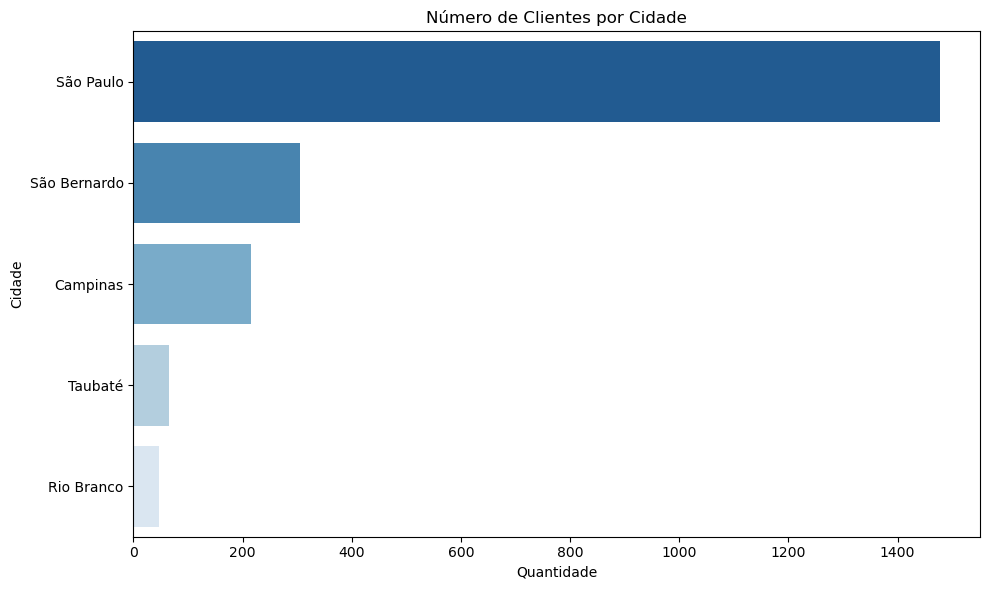

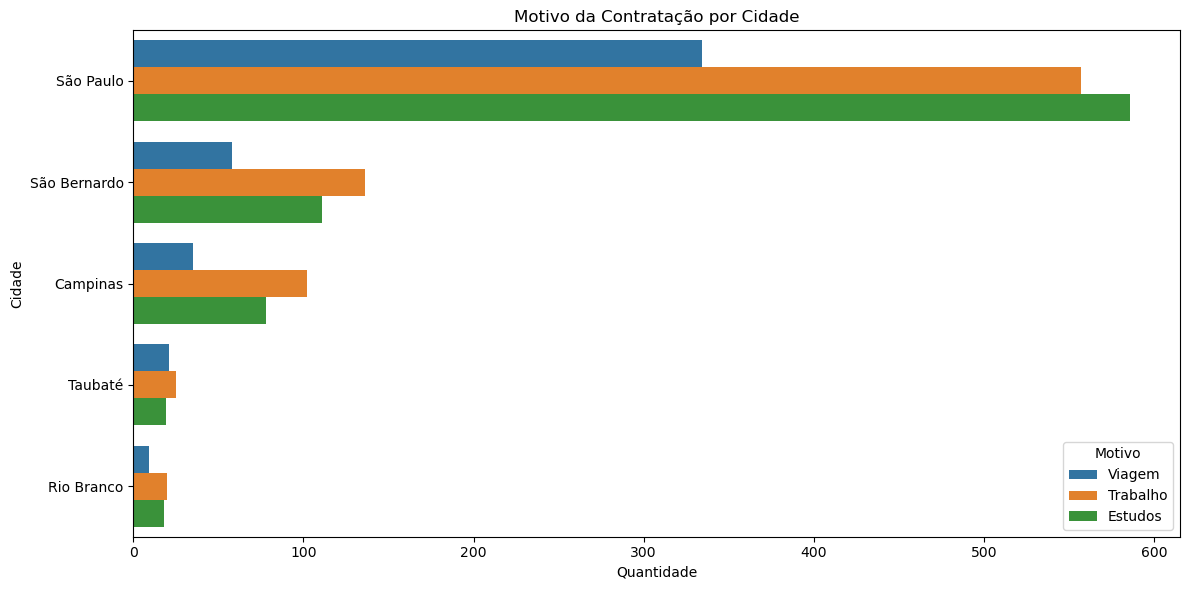

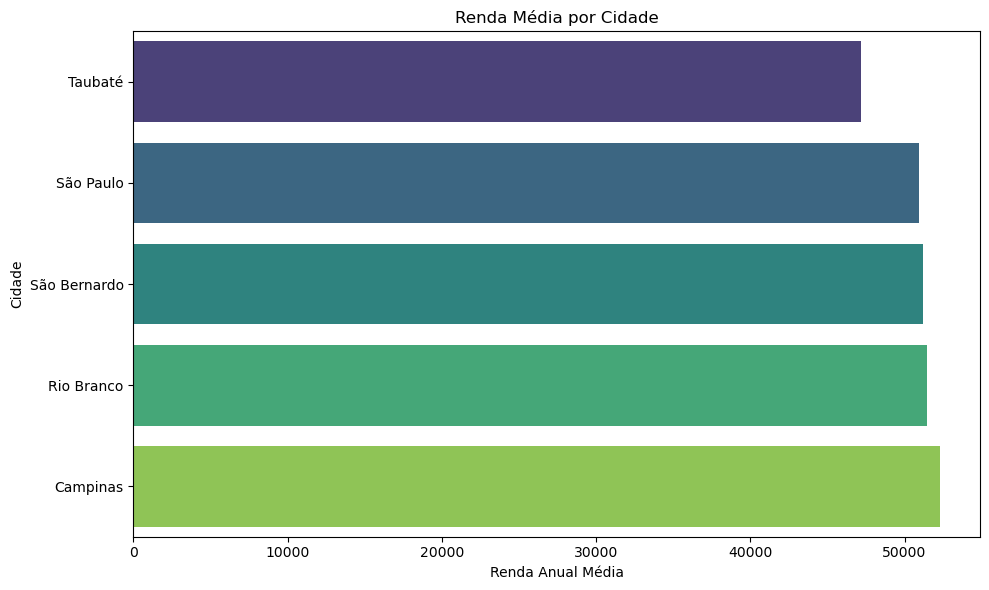

In [ ]:
# Gráfico 1: Contagem absoluta de clientes por cidade
plt.figure(figsize=(10, 6))
cidade_order = df['Cidade'].value_counts().index
sns.countplot(data=df, y='Cidade', order=cidade_order, palette='Blues_r')
plt.title('Número de Clientes por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição por Motivo dentro de cada cidade (proporcional)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cidade', hue='Motivo', order=cidade_order)
plt.title('Motivo da Contratação por Cidade')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.legend(title='Motivo')
plt.tight_layout()
plt.show()

# Gráfico 3: Renda média por cidade
renda_cidade = df.groupby('Cidade')['Renda_anual'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=renda_cidade.values, y=renda_cidade.index, palette='viridis')
plt.title('Renda Média por Cidade')
plt.xlabel('Renda Anual Média')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

cruzar cluster com cidade?

In [ ]:
# Tópico 4 — Poder Aquisitivo por Região (utilizando cidades como proxy de região)

# Calcular estatísticas de renda por cidade
renda_stats = df.groupby('Cidade')['Renda_anual'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)
renda_stats = renda_stats.rename(columns={
    'mean': 'Renda Média',
    'median': 'Renda Mediana',
    'count': 'Qtd Clientes',
    'std': 'Desvio Padrão'
})

## Reexibir a tabela de forma compatível com o ambiente do usuário

renda_stats.reset_index(inplace=True)
renda_stats


,Cidade,Renda Média,Renda Mediana,Qtd Clientes,Desvio Padrão
0,Campinas,52278.814857,50785.0,215,20225.821415
1,Rio Branco,51462.870616,50116.0,47,20154.513148
2,São Bernardo,51172.561184,51124.0,305,20791.609706
3,São Paulo,50913.045999,50870.0,1477,20561.587128
4,Taubaté,47190.742709,48007.5,65,20111.521835


#### Conclusoes 

A base de clientes é heterogênea, mas segmentável

A análise mostrou que, apesar da diversidade em idade, renda, escolaridade e objetivos, a base se organiza em três clusters bem definidos, validados estatisticamente (Silhouette Score) e visualmente (PCA).

O Elbow Method indicou que k=3 é o ponto ótimo, e o Silhouette Score (~0.27) mostra que há coesão nos grupos formados.

A visualização PCA confirmou separação espacial clara entre os clusters, legitimando a aplicação de marketing segmentado.

🔵 Cluster 0 – Jovem, de menor renda e engajamento
Idade: ~24 anos
Renda: ~R$ 30.000
Aulas: ~11
Educação: predomina Ensino Médio/Graduação
Motivação principal: Estudos
NPS mais baixo
        - Este grupo representa estudantes ou recém-formados que procuram capacitação, mas têm menor poder aquisitivo e engajamento reduzido. 

🟢 Cluster 1 – Profissional qualificado e engajado
Idade: ~34 anos
Renda: ~R$ 45.000
Aulas: ~22 (maior média)
Educação: elevada (predomínio de Mestrado e Doutorado)
Motivação principal: Trabalho
Maior NPS (3,17)
        - Este é o cliente ideal em termos de satisfação, engajamento e perfil educacional. Apesar de não ter a maior renda, valoriza o serviço; focar em programas de fidelização, planos recorrentes, upgrades, e benefícios de continuidade. Este é o core da operação atual.


🔴 Cluster 2 – Alta renda, qualificado e com perfil equilibrado
Idade: ~31 anos
Renda: ~R$ 71.000
Aulas: ~18
Educação: alto nível (graduação + mestrado)
Moradia superior (5 quartos, 4 banheiros)
Motivações diversas: Trabalho, Viagem e Estudos
        - Trata-se do público mais rentável e com maior potencial de compra de serviços premium. Possui perfil maduro e procura experiências completas.Criar produtos com posicionamento elevado, como consultorias personalizadas, professores nativos, certificações internacionais, entre outros. Priorizar este grupo em campanhas de valor agregado.

Geografia importa — São Paulo lidera com folga
Todos os clusters são altamente concentrados em São Paulo, mas o Cluster 2 tem a maior presença proporcional.
Cidades como Campinas, São Bernardo e Taubaté têm importância secundária, mas relevante para ações regionais.

Estratégias regionais devem priorizar São Paulo como epicentro de campanhas, com microsegmentações locais nos demais polos urbanos.

#### PADRÕES DE CONSUMO

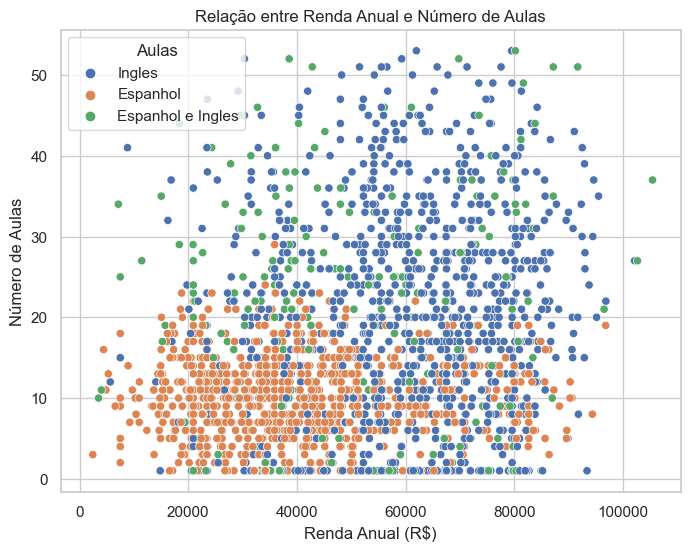

📈 Faixas etárias que mais consomem aulas (média):
faixa_idade
<1980    18.160550
1990s    17.006250
1980s    16.829736
2000s    15.825561
2010s    13.556863
Name: Num_Aulas, dtype: float64 

🎓 Nível educacional que mais consome aulas (média):
Education
Doutorado             19.567237
Mestrado              16.018519
Graduação             15.697321
Ensino Médio          14.821782
Ensino Fundamental    13.203704
Name: Num_Aulas, dtype: float64 

🎯 Motivo mais associado ao consumo de aulas (média):
Motivo
Trabalho    17.011905
Estudos     16.105911
Viagem      15.564551
Name: Num_Aulas, dtype: float64 

📚 Tipos de aula mais contratados (frequência):
Aulas
Ingles               993
Espanhol             896
Espanhol e Ingles    220
Name: count, dtype: int64 

🧓 Idade média dos maiores consumidores (top 25% em número de aulas): 31.37 anos


In [34]:


# 1. Quem mais compra aulas? (Top perfis por média de aulas)
mais_aulas_por_faixa_etaria = df.groupby("faixa_idade")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_educacao = df.groupby("Education")["Num_Aulas"].mean().sort_values(ascending=False)
mais_aulas_por_motivo = df.groupby("Motivo")["Num_Aulas"].mean().sort_values(ascending=False)

# 2. Tipos de aula mais contratados
tipos_de_aula = df["Aulas"].value_counts()

# 3. Relação entre Renda e Número de Aulas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Renda_anual", y="Num_Aulas", hue="Aulas")
plt.title("Relação entre Renda Anual e Número de Aulas")
plt.xlabel("Renda Anual (R$)")
plt.ylabel("Número de Aulas")
plt.show()

# 4. Idade média dos maiores consumidores (top 25% em número de aulas)
limite_top_consumidores = df["Num_Aulas"].quantile(0.75)
top_consumidores = df[df["Num_Aulas"] >= limite_top_consumidores]
idade_media_top_consumidores = top_consumidores["Idade"].mean()

# Exibir os resultados analíticos
print("📈 Faixas etárias que mais consomem aulas (média):")
print(mais_aulas_por_faixa_etaria, "\n")

print("🎓 Nível educacional que mais consome aulas (média):")
print(mais_aulas_por_educacao, "\n")

print("🎯 Motivo mais associado ao consumo de aulas (média):")
print(mais_aulas_por_motivo, "\n")

print("📚 Tipos de aula mais contratados (frequência):")
print(tipos_de_aula, "\n")

print(f"🧓 Idade média dos maiores consumidores (top 25% em número de aulas): {idade_media_top_consumidores:.2f} anos")


o número de aulas contratadas está fortemente associado à maturidade e ao nível educacional dos usuários: indivíduos com maior escolaridade — especialmente aqueles com mestrado ou doutorado — e com idade acima dos 30 anos são os que mais consomem. A motivação profissional (“trabalho”) aparece como o principal impulsionador do engajamento, superando motivos como “estudos” ou “viagem”. Além disso, o inglês é o idioma mais demandado, embora o espanhol também tenha relevância significativa, apontando para oportunidades em pacotes combinados. Apesar da renda influenciar o consumo, a relação não é perfeitamente linear, o que indica que fatores como tempo disponível e motivação são igualmente decisivos. Esses achados sustentam decisões estratégicas voltadas à personalização de campanhas, à diversificação de produtos e à segmentação com base no ciclo de vida e objetivo do cliente.

#### SATISFAÇÃO E NPS